# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [2]:
import pandas as pd
        
X_train = pd.read_csv('../../../../Datasets/Human Activity Recognition Using Smartphones/UCI HAR Dataset/train/X_train.csv', sep = ',', index_col=[0, 1])
X_train

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
index,ID,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,30,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,30,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,30,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811


In [11]:
Y_train = pd.read_csv('../../../../Datasets/Human Activity Recognition Using Smartphones/UCI HAR Dataset/train/y_train.txt', sep = '\s+', header=None)
# renomeando a coluna para target
Y_train.columns = ['target']
Y_train

,target
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [12]:
# train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [13]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, Y_train)
best_features = pd.Series(tree.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(3)
best_features

tGravityAcc-min()-X                0.285303
fBodyAccJerk-bandsEnergy()-1,16    0.254091
tGravityAcc-mean()-Y               0.164608
dtype: float64

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

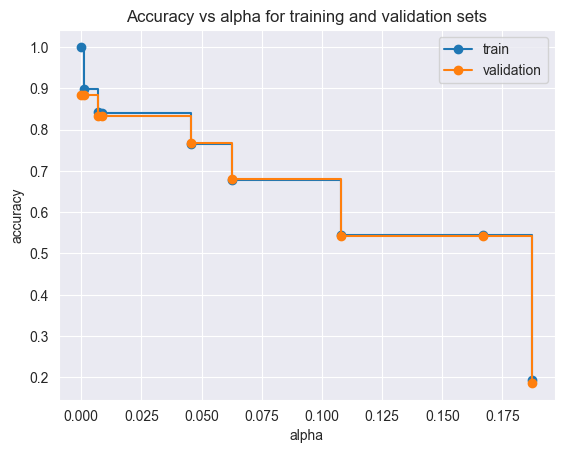

CPU times: total: 281 ms
Wall time: 460 ms


In [14]:
%%time
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
path = tree.cost_complexity_pruning_path(X_train[best_features.index], Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train[best_features.index], Y_train)
    clfs.append(clf)


train_scores = [clf.score(X_train[best_features.index], Y_train) for clf in clfs]
val_scores = [clf.score(X_val[best_features.index], Y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker='o', label="validation",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [15]:
print(f'Melhor ccp_alpha: {ccp_alphas[np.argmax(val_scores)]}')
print(f'Melhor acurácia: {max(val_scores)}')

Melhor ccp_alpha: 0.0
Melhor acurácia: 0.8846572361262242


    ### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

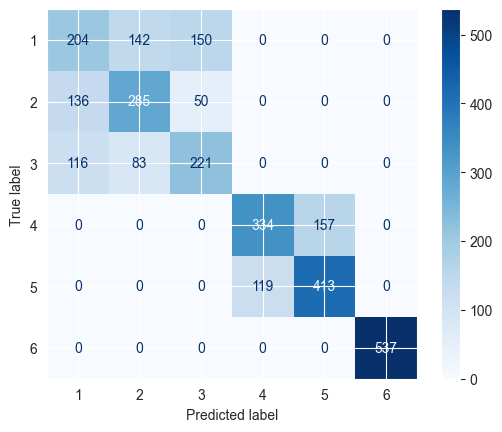

In [23]:
X_test = pd.read_csv('../../../../Datasets/Human Activity Recognition Using Smartphones/UCI HAR Dataset/test/X_test.csv', sep = ',', index_col=[0, 1])
y_test = pd.read_csv('../../../../Datasets/Human Activity Recognition Using Smartphones/UCI HAR Dataset/test/y_test.txt', sep = '\s+', header=None)
y_test.columns = ['target']

tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alphas[np.argmax(val_scores)])
tree.fit(X_train[best_features.index], Y_train)
y_pred = tree.predict(X_test[best_features.index])

cm = confusion_matrix(y_test, y_pred)   
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
# mudar cores
disp.plot(cmap='Blues')
plt.show()


In [29]:
target_names = [str(cls) for cls in tree.classes_]
print(classification_report(y_test, y_pred, target_names= target_names))


              precision    recall  f1-score   support

           1       0.45      0.41      0.43       496
           2       0.56      0.61      0.58       471
           3       0.52      0.53      0.53       420
           4       0.74      0.68      0.71       491
           5       0.72      0.78      0.75       532
           6       1.00      1.00      1.00       537

    accuracy                           0.68      2947
   macro avg       0.67      0.67      0.67      2947
weighted avg       0.68      0.68      0.68      2947



### 6. Conclusão

Acurácia do modelo de treino foi de 0.88 enquanto na base de testes fooi de 0.67 o que indica que o modelo está com overfitting. A matriz de confusão mostra que o modelo está com dificuldade em classificar as atividades de 1 a 5.